# Blood Glucose Control - EDA

**Name:** *Sanidhya Barara*



### Import Data

There are multiple data sets each corresponding to a person with diabetes. Please load the files into a single data set while retaining the ability to distinguish between the PWD.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from sklearn.metrics import confusion_matrix

#import all necessary modules

df1 = pd.read_csv('gluroo_500030.csv')
df1['id'] = 500030

df2 = pd.read_csv('gluroo_679372.csv')
df2['id'] = 679372

#read the two csv files separately and add columns containing the patient's id

df = pd.concat([df1, df2])

#bring together the csv files into a single dataset

df['interval'] = df['date'].apply(lambda x: x[27:29]) # trimming the head
df['date'] = df['date'].apply(lambda x: x[:19]) # trimming the tail

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
df['dateWOtime'] = df['date'].dt.date

#Add a new column to the dataset which contains the date without times

newdf = pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)

#without altering the original dataset create a new dataset that contains all the values we need for our visualisations



date=[]
for i in df.groupby(['dateWOtime','id'])['dateWOtime']:
    date.append(list(list(i)[0])[0])

newdf['date'] = date

#add column for date

id=[]
for i in df.groupby(['dateWOtime','id'])['dateWOtime']:
    id.append(list(list(i)[0])[1])

newdf['id'] = id

#add column for id

food_consumed=[]
for i in df.groupby(['dateWOtime','id'])['food_g'].sum():
    food_consumed.append(i)

newdf['food_consumed'] = food_consumed

#add column indicating the sum of food_g for a given day and patient to give the total food consumed in the day

total_insulin=[]
for i in df.groupby(['dateWOtime','id'])['dose_units'].sum():
    total_insulin.append(i)

newdf['total_insulin'] = total_insulin

#add column indicating the sum of insulin for a given day and patient to give total insulin taken in the day

avg_bgl=[]
for i in df.groupby(['dateWOtime','id'])['bgl'].mean():
    avg_bgl.append(i)

newdf['avg_bgl'] = avg_bgl

#add column containing the average of all bgl readings of patient in the day to give abg bgl reading for the day

had_snack=[]
had_extra_insulin=[]
for i in df.groupby(['dateWOtime','id'])['msg_type'].unique():
    if 'INTERVENTION_SNACK' in list(i):
        had_snack.append('Yes')
    else:
        had_snack.append('No')

    if 'DOSE_INSULIN' in list(i):
        had_extra_insulin.append('Yes')
    else:
        had_extra_insulin.append('No')

#add column indicating if the patient had snacks on a day and if they had additional insulin in a day

newdf['had_snack']=had_snack
newdf['had_extra_insulin']=had_extra_insulin

display(newdf)

,date,id,food_consumed,total_insulin,avg_bgl,had_snack,had_extra_insulin
0,2024-05-01,500030,154.00,58.0,109.362126,Yes,Yes
1,2024-05-02,500030,211.00,74.0,120.066225,No,Yes
2,2024-05-03,500030,218.00,62.0,106.809836,Yes,Yes
3,2024-05-04,500030,109.00,35.0,124.877133,Yes,Yes
4,2024-05-05,500030,201.00,76.0,108.637584,Yes,Yes
...,...,...,...,...,...,...,...
170,2024-07-29,679372,128.54,14.0,128.456311,Yes,Yes
171,2024-07-30,500030,325.00,57.0,100.038585,Yes,Yes
172,2024-07-30,679372,30.00,10.0,126.646799,Yes,Yes
173,2024-07-31,500030,151.00,58.0,126.742574,Yes,Yes


### Two Data Visualizations

Create at least two visualizations that are of interest to you. They can be things that would be useful information for a PWD to know, or they could be useful for informing future modeling work. If you aren't sure what to visualize try recreating common diabetes data visualizations that you can find on the internet.

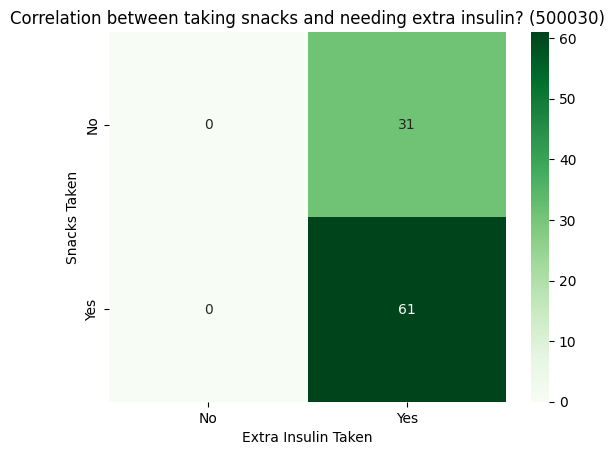

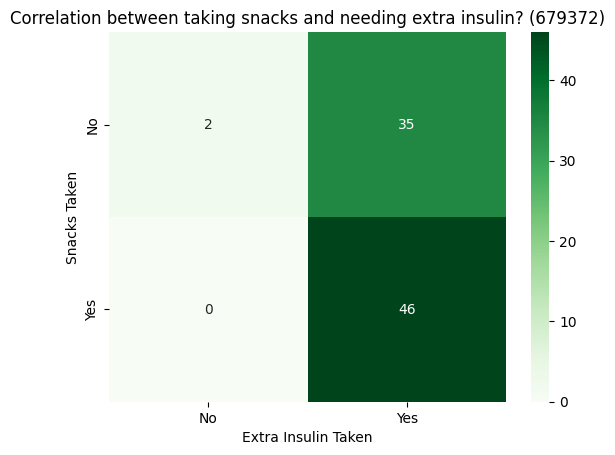

In [2]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(newdf.loc[newdf['id'] == 500030]['had_snack'], newdf.loc[newdf['id'] == 500030]['had_extra_insulin']), annot=True, fmt='g', ax=ax, cmap='Greens');  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Extra Insulin Taken');ax.set_ylabel('Snacks Taken');
ax.set_title('Correlation between taking snacks and needing extra insulin? (500030)');
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes'])
plt.show(ax)

ax2= plt.subplot()
sns.heatmap(confusion_matrix(newdf.loc[newdf['id'] == 679372]['had_snack'], newdf.loc[newdf['id'] == 679372]['had_extra_insulin']), annot=True, fmt='g', ax=ax2, cmap='Greens');  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax2.set_xlabel('Extra Insulin Taken');ax2.set_ylabel('Snacks Taken');
ax2.set_title('Correlation between taking snacks and needing extra insulin? (679372)');
ax2.xaxis.set_ticklabels(['No', 'Yes']); ax2.yaxis.set_ticklabels(['No', 'Yes'])
plt.show(ax2)

This is interesting. I had assumed that taking snacks would be associated with taking more insulin, but taking more insulin just seems to be the normal case, with taking snacks being an added independent variable. There does not seem to be a clear enough correlation between taking snacks and needing more insulin. However, these insights are based on data from only 2 PWDs, which isn't nearly enough to be statistically significant. Perhaps more generalisations could be made if we had more patients' data.

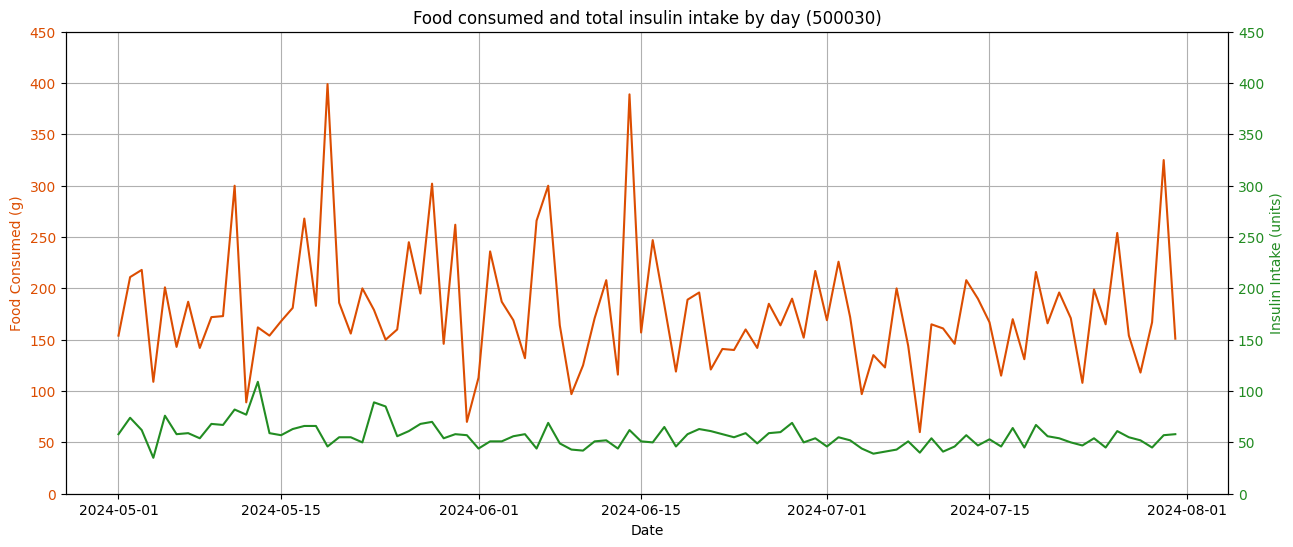

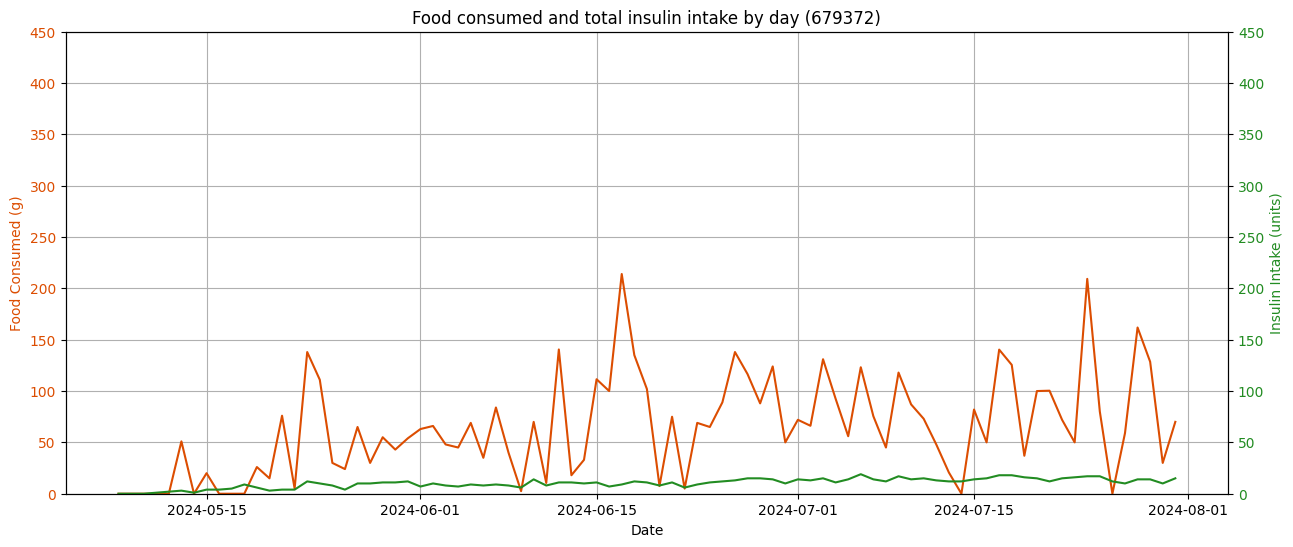

In [3]:
fig, ax = plt.subplots(figsize = (15, 6))

#create a comfortably large figure

ax.set_title('Food consumed and total insulin intake by day (500030)')
ax.set_xlabel('Date')
ax.set_ylabel('Food Consumed (g)', color='#dc4d01')

#set the title, x axis label and first y axis label

ax.plot(newdf.loc[newdf['id'] == 500030]['date'], newdf.loc[newdf['id'] == 500030]['food_consumed'], color='#dc4d01')
ax.tick_params(axis='y', labelcolor='#dc4d01')
ax.set_ylim(0, 450)

#plot first y-axis as 'food_consumed' for 500030 with dates as x-axis

ax2 = ax.twinx()

#create secondary y-axis on the right side

ax2.set_ylabel('Insulin Intake (units)', color='#228c22')

#set the y axis label for the secondary axis

ax2.plot(newdf.loc[newdf['id'] == 500030]['date'], newdf.loc[newdf['id'] == 500030]['total_insulin'], color='#228c22')
ax2.tick_params(axis='y', labelcolor='#228c22')
ax2.set_ylim(0, 450)

#plot second y-axis as 'total_insulin' for 500030 with dates as x-axis

ax.grid(True)
plt.show()

#plot the graph for the first patient

#Now repeat the same exact step but for second patient

fig, ax = plt.subplots(figsize = (15, 6))

ax.set_title('Food consumed and total insulin intake by day (679372)')
ax.set_xlabel('Date')
ax.set_ylabel('Food Consumed (g)', color='#dc4d01')

ax.plot(newdf.loc[newdf['id'] == 679372]["date"], newdf.loc[newdf['id'] == 679372]["food_consumed"], color='#dc4d01')
ax.tick_params(axis='y', labelcolor='#dc4d01')
ax.set_ylim(0, 450)

ax2 = ax.twinx()
ax2.set_ylabel('Insulin Intake (units)', color='#228c22')
ax2.plot(newdf.loc[newdf['id'] == 679372]['date'], newdf.loc[newdf['id'] == 679372]['total_insulin'], color='#228c22')
ax2.tick_params(axis='y', labelcolor='#228c22')
ax2.set_ylim(0, 450)

ax.grid(True)
plt.show()

#plot the graph for the second patient

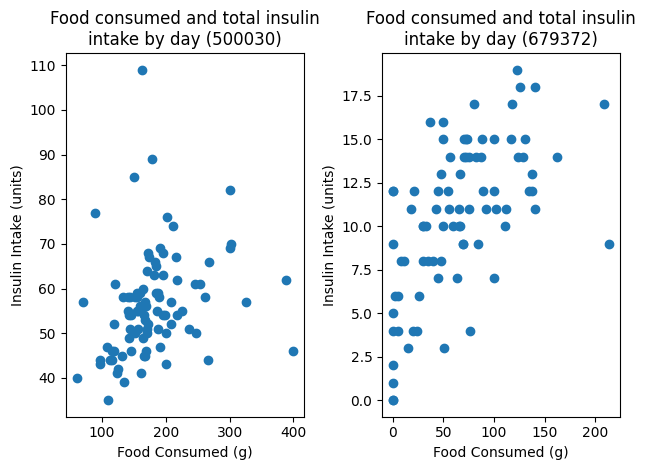

In [4]:
plt.subplot(1, 2, 1)
fig = plt.scatter(newdf.loc[newdf['id'] == 500030]['food_consumed'], newdf.loc[newdf['id'] == 500030]['total_insulin'])
plt.title('Food consumed and total insulin\nintake by day (500030)')
plt.xlabel('Food Consumed (g)')
plt.ylabel('Insulin Intake (units)')

#Scatter plot for 500030

plt.subplot(1, 2, 2)
fig = plt.scatter(newdf.loc[newdf['id'] == 679372]['food_consumed'], newdf.loc[newdf['id'] == 679372]['total_insulin'])
plt.title('Food consumed and total insulin\nintake by day (679372)')
plt.xlabel('Food Consumed (g)')
plt.ylabel('Insulin Intake (units)')

#Scatter plot for 679372

plt.tight_layout()
plt.show()

The above are graphs of the food consumed (in grams of carbs) vs the total insulin intake over the day (in units). My prediction would have been that the more the food consumed is, the greater the insulin needed would be. And at a cursory glance (without rigorous statistical analysis), we appear to have arrived at a semi-null result.

The graphs for food consumed and insulin taken seem to be fairly independent with different peaks and troughs for patient 1. The scatterplot shows some level of upwards trend from left to right, but there exist several outliers.

However, the graph shows some level of corellation for patient 2 sharing some similarities in peaks and troughs. The scatterplot also shows that there is a general upwards trend from left to right.

Yet again, no generalisations can be made due to the small number of sample points.

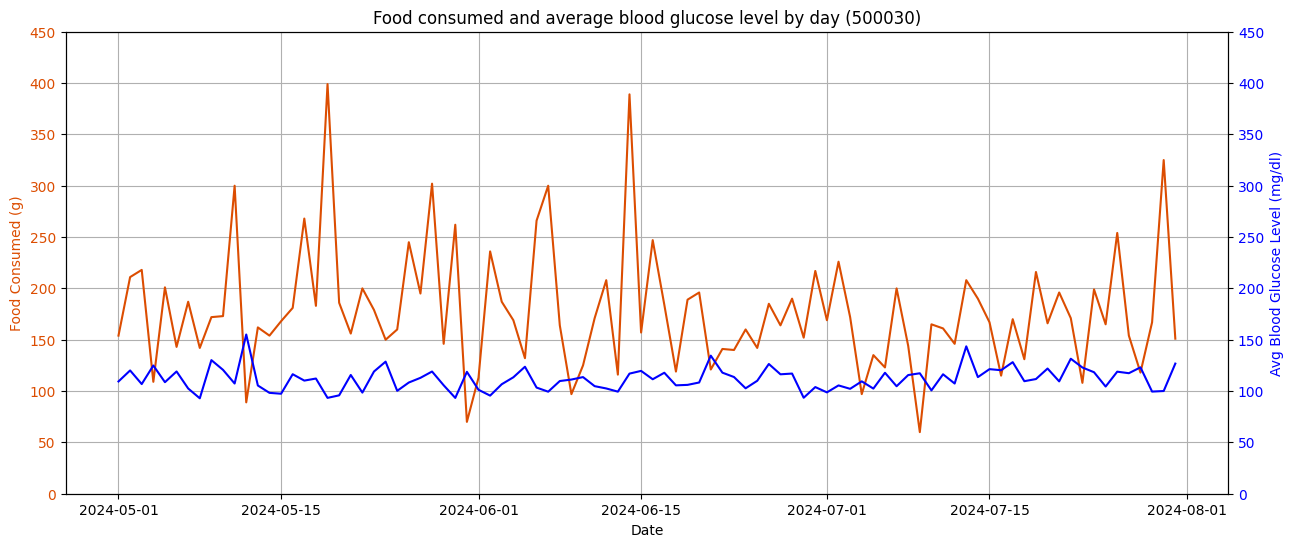

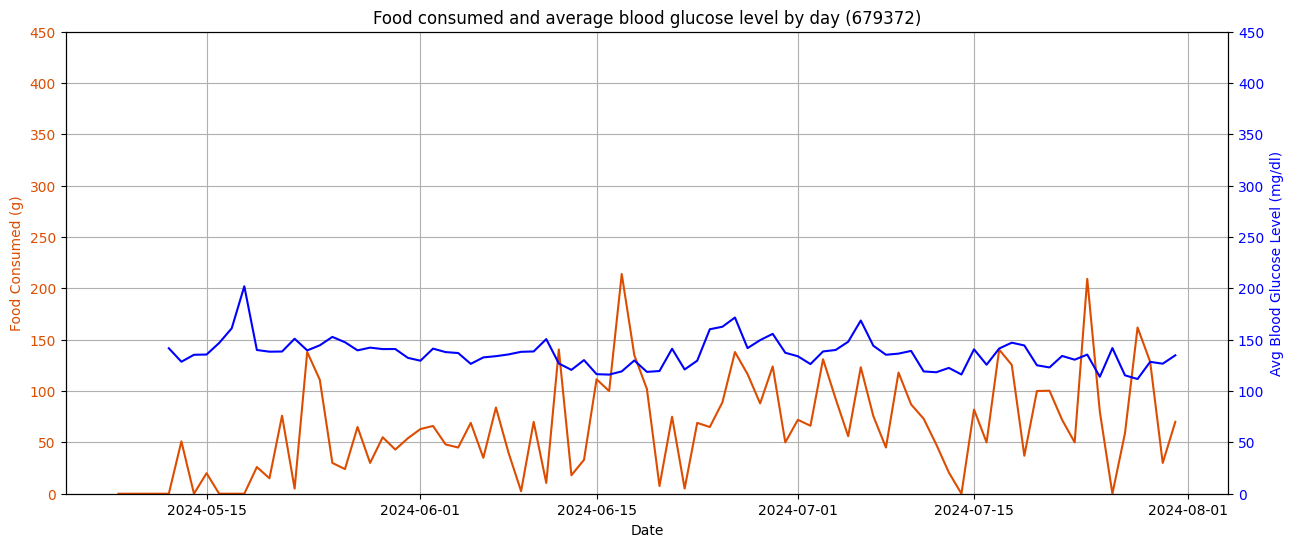

In [5]:
fig, ax = plt.subplots(figsize = (15, 6))

#create a comfortably large figure

ax.set_title('Food consumed and average blood glucose level by day (500030)')
ax.set_xlabel('Date')
ax.set_ylabel('Food Consumed (g)', color='#dc4d01')

#set the title, x axis label and first y axis label

ax.plot(newdf.loc[newdf['id'] == 500030]['date'], newdf.loc[newdf['id'] == 500030]['food_consumed'], color='#dc4d01')
ax.tick_params(axis='y', labelcolor='#dc4d01')
ax.set_ylim(0, 450)

#plot first y-axis as 'food_consumed' for 500030 with dates as x-axis

ax2 = ax.twinx()

#create secondary y-axis on the right side

ax2.set_ylabel('Avg Blood Glucose Level (mg/dl)', color='#0000ff')

#set the y axis label for the secondary axis

ax2.plot(newdf.loc[newdf['id'] == 500030]['date'], newdf.loc[newdf['id'] == 500030]['avg_bgl'], color='#0000ff')
ax2.tick_params(axis='y', labelcolor='#0000ff')
ax2.set_ylim(0, 450)

#plot second y-axis as 'avg_bgl' for 500030 with dates as x-axis

ax.grid(True)
plt.show()

#plot the graph for the first patient

#Now repeat the same exact step but for second patient

fig, ax = plt.subplots(figsize = (15, 6))

ax.set_title('Food consumed and average blood glucose level by day (679372)')
ax.set_xlabel('Date')
ax.set_ylabel('Food Consumed (g)', color='#dc4d01')

ax.plot(newdf.loc[newdf['id'] == 679372]['date'], newdf.loc[newdf['id'] == 679372]['food_consumed'], color='#dc4d01')
ax.tick_params(axis='y', labelcolor='#dc4d01')
ax.set_ylim(0, 450)

ax2 = ax.twinx()
ax2.set_ylabel('Avg Blood Glucose Level (mg/dl)', color='#0000ff')
ax2.plot(newdf.loc[newdf['id'] == 679372]['date'], newdf.loc[newdf['id'] == 679372]['avg_bgl'], color='#0000ff')
ax2.tick_params(axis='y', labelcolor='#0000ff')
ax2.set_ylim(0, 450)

ax.grid(True)
plt.show()

#plot the graph for the second patient

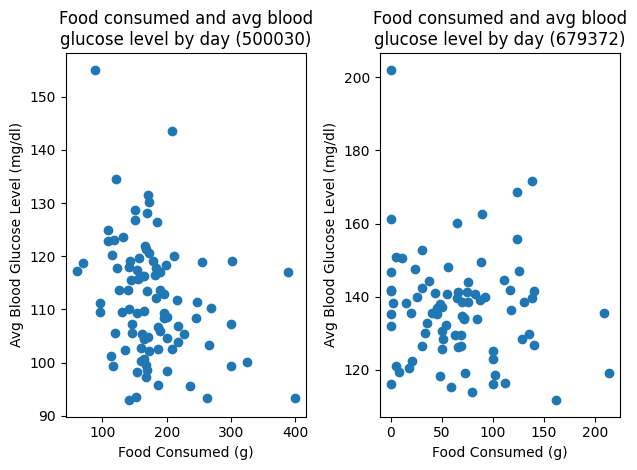

In [6]:
plt.subplot(1, 2, 1)
fig = plt.scatter(newdf.loc[newdf['id'] == 500030]['food_consumed'], newdf.loc[newdf['id'] == 500030]['avg_bgl'])
plt.title('Food consumed and avg blood\nglucose level by day (500030)')
plt.xlabel('Food Consumed (g)')
plt.ylabel('Avg Blood Glucose Level (mg/dl)')

#Scatter plot for 500030

plt.subplot(1, 2, 2)
fig = plt.scatter(newdf.loc[newdf['id'] == 679372]['food_consumed'], newdf.loc[newdf['id'] == 679372]['avg_bgl'])
plt.title('Food consumed and avg blood\nglucose level by day (679372)')
plt.xlabel('Food Consumed (g)')
plt.ylabel('Avg Blood Glucose Level (mg/dl)')

#Scatter plot for 679372

plt.tight_layout()
plt.show()

This visualisation is one that I believe to be the most significant one yet. The inherent prediction going in was that the higher the food consumed is, the higher the average blood glucose level would be.

To some degree, this is seen in the graph for patient 2. The first half is a little chaotic, showing no relation between food and avg bgl. The second half of the graph is less chaotic, with a more evident relation between the peaks and troughs of the graphs. In this case, it is easier to infer from the graph than from the scatterplot, in which some level of upwards trend may be seen with some difficulty.

Interestingly though, the graph for patient 1 shows the exact opposite of the prediction; it shows peaks in bgl where the food consumed is low, and troughs in bgl where the food consumed is high. I frankly have no explanation for why this could be, and think asks for a deeper look. The scatterplot also confirms this rough trend, going down from left to right.

And as always, more datapoints will be needed to make any sort of statistical inference.

### Ask a question(s) about the data and/or diabetes!
When creating the visualizations you probably had some questions about managing T1D. Ask some questions that might interest you and our diabetes experts will do their best to answer them for you! *Consider this an AMAA about diabetes.*

1. The visualisations above seem to establish some loose connection between insulin intake, blood glucose level, and food consumed. Would it be possible to further establish a more proper connection between them using a 3 variable graph? And if so, could we use inferences from these graphs to train a model to predict how much insulin a person will require for a certain amout of food? How much to reduce their bgl by a certain amount? Or, by analysing other factors like time, how much they'll need in the near future?

2. One factor not considered yet is excercise. While the database does include a message for logging when excercise is carried out, it makes no mention of the type of excercise. Could analysing the drop in bgl for patients with similar characteristics using different types of excercise help find which ones are the most helpful in maintaining blood sugar if it gets far too high?

### Final Task

Thanks for showing interest in our project! We plan to incorporate the best/most interesting visualizations into a substack post in the future.

Please remember to create a pull request with your updated template, don't forget to rename the file to something that we can identify you with, e.g: `eda_[your_name].ipynb`